29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


C:\Users\Mohamed Suhaib\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 25ms/step - accuracy: 0.6794 - loss: 0.8598 - val_accuracy: 0.8542 - val_loss: 0.4003
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8524 - loss: 0.3998 - val_accuracy: 0.8742 - val_loss: 0.3360
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.8793 - loss: 0.3263 - val_accuracy: 0.8932 - val_loss: 0.3025
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 22s 27ms/step - accuracy: 0.8892 - loss: 0.2957 - val_accuracy: 0.9030 - val_loss: 0.2760
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 24s 29ms/step - accuracy: 0.8964 - loss: 0.2747 - val_accuracy: 0.8970 - val_loss: 0.2702


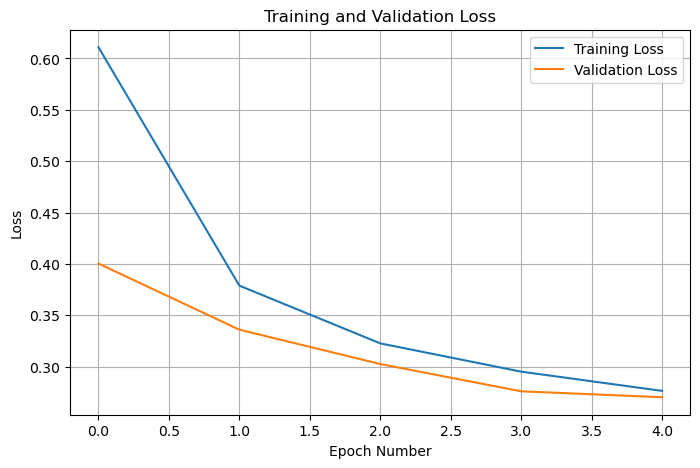

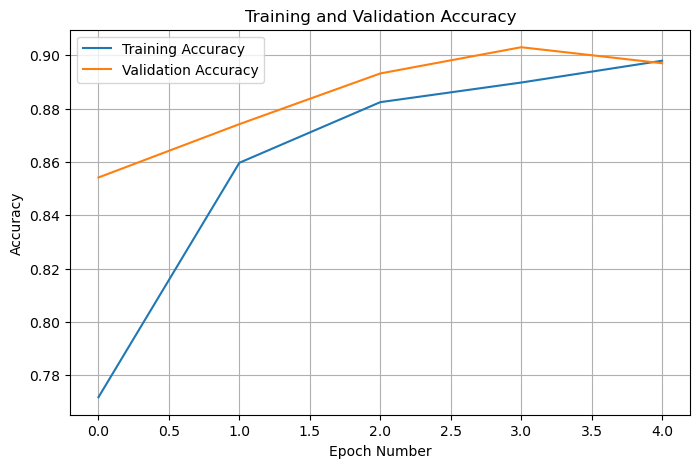

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8975 - loss: 0.2845


Test Accuracy: 0.8978


In [1]:
# ~~~ Working on the Data set ~~~

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.utils import to_categorical

# Set a random seed for reproducibility
np.random.seed(42)

# Load the mnist dataset from keras
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Preprocess the training data
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

# Preprocess the test data
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# ~~~ Model ~~~

# Create the model
model = models.Sequential()

# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output for the dense layer
model.add(layers.Flatten())

# Add dense layers
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Print model summary
model.summary()

# Compile the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
training_history = model.fit(train_images, train_labels,
                             epochs=5,
                             batch_size=64,
                             validation_split=0.1)

# Plot Loss
plt.figure(figsize=(8, 5))
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot Accuracy
plt.figure(figsize=(8, 5))
plt.plot(training_history.history['accuracy'], label='Training Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model on test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

# Save the model
model.save('fashionmnist2.h5')


In [3]:
# To load the mnist data
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential

# importing various types of hidden layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

# Adam optimizer for better LR and less loss
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Split the data into training and testing
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)

Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


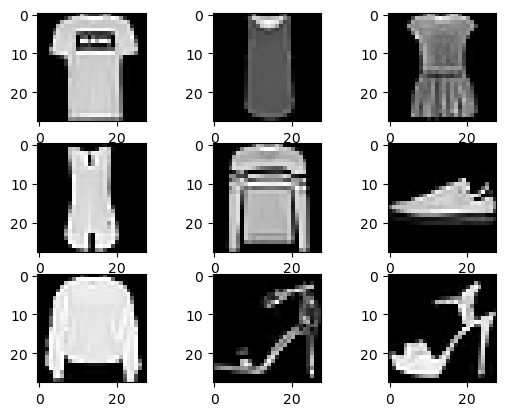

In [7]:
for i in range(1, 10):
    # Create a 3x3 grid and place the
    # image in ith position of grid
    plt.subplot(3, 3, i)
    # Insert ith image with the color map 'grap'
    plt.imshow(trainX[i], cmap=plt.get_cmap('gray'))

# Display the entire plot
plt.show()

In [9]:
trainX = np.expand_dims(trainX, -1)
testX = np.expand_dims(testX, -1)

print(trainX.shape)

(60000, 28, 28, 1)


In [11]:
def model_arch():
    models = Sequential()
    
    # We are learning 64 
    # filters with a kernel size of 5x5
    models.add(Conv2D(64, (5, 5),
                      padding="same",
                      activation="relu", 
                      input_shape=(28, 28, 1)))
    
    # Max pooling will reduce the
    # size with a kernel size of 2x2
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(128, (5, 5), padding="same",
                      activation="relu"))
    
    models.add(MaxPooling2D(pool_size=(2, 2)))
    models.add(Conv2D(256, (5, 5), padding="same", 
                      activation="relu"))
    
    models.add(MaxPooling2D(pool_size=(2, 2)))
    
    # Once the convolutional and pooling 
    # operations are done the layer
    # is flattened and fully connected layers
    # are added
    models.add(Flatten())
    models.add(Dense(256, activation="relu"))
    
    # Finally as there are total 10
    # classes to be added a FCC layer of
    # 10 is created with a softmax activation
    # function
    models.add(Dense(10, activation="softmax"))
    return models

In [13]:
model = model_arch()

model.compile(optimizer=Adam(learning_rate=1e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 14, 14, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 7, 7, 256)      │       819,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 3, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,618,698 (6.17 MB)

 Trainable params: 1,618,698 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(
    trainX.astype(np.float32), trainy.astype(np.float32),
    epochs=10,
    steps_per_epoch=100,
    validation_split=0.33
)

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - loss: 9.0938 - sparse_categorical_accuracy: 0.5224 - val_loss: 0.3902 - val_sparse_categorical_accuracy: 0.8566
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 187s 2s/step - loss: 0.3626 - sparse_categorical_accuracy: 0.8701 - val_loss: 0.3283 - val_sparse_categorical_accuracy: 0.8800
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 180s 2s/step - loss: 0.3044 - sparse_categorical_accuracy: 0.8884 - val_loss: 0.3025 - val_sparse_categorical_accuracy: 0.8910
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 152s 2s/step - loss: 0.2636 - sparse_categorical_accuracy: 0.9035 - val_loss: 0.3095 - val_sparse_categorical_accuracy: 0.8863
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - loss: 0.2420 - sparse_categorical_accuracy: 0.9104 - val_loss: 0.2939 - val_sparse_categorical_accuracy: 0.8942
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - loss: 0.2118 - sparse_categorical_accuracy: 0.9222 - val_loss: 0.2918 - val_sparse_categorical_accuracy: 0.892

In [21]:
model.save('fashionmnistmodel.h5', overwrite=True)

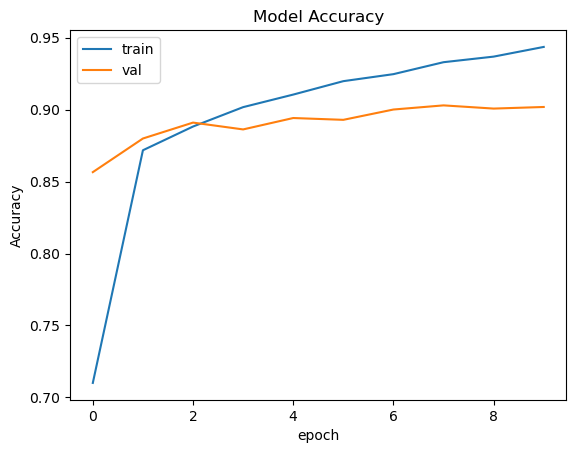

In [23]:
# Accuracy vs Epoch plot
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

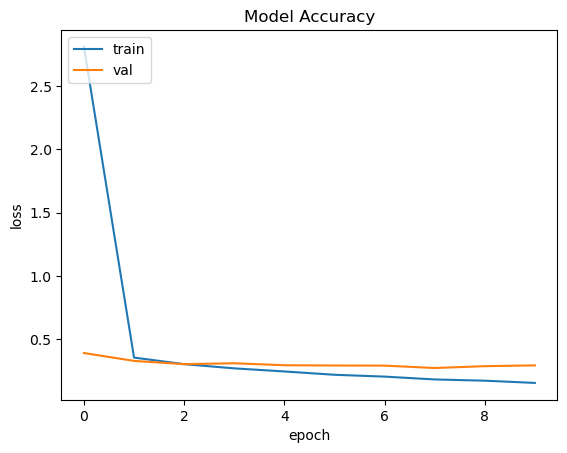

In [24]:
# Loss vs Epoch plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Accuracy')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 928ms/step
ankle_boots


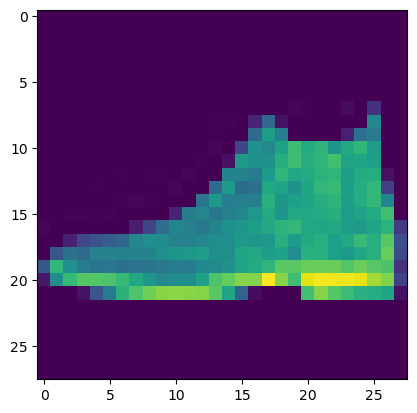

In [26]:
# There are 10 output labels for the Fashion MNIST dataset
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# Make a prediction
predictions = model.predict(testX[:1])
label = labels[np.argmax(predictions)]

print(label)
plt.imshow(testX[:1][0])
plt.show()